In [1]:
import numpy as np
import pandas as pd
from pycaret.regression import *

#### In this example, we will train a customized model based on SKEMPIv2 and PDBB datasets 
NOTE: replace the below filename with the customized feature filename, e.g. ppi_index_extract_"newname".csv. The stem "ppi_index_extract_" is required.

In [2]:
df = pd.read_csv("ppi_index_extract_skempiv2-pdbb.csv",index_col=0, delimiter=",")

In [3]:
exp_reg = setup(data = df, target = 'kd', imputation_type = 'simple', normalize = True, pca = False, session_id=123)

,Description,Value
0,Session id,123
1,Target,kd
2,Target type,Regression
3,Original data shape,"(5867, 48)"
4,Transformed data shape,"(5867, 48)"
5,Transformed train set shape,"(4106, 48)"
6,Transformed test set shape,"(1761, 48)"
7,Numeric features,47
8,Rows with missing values,1.0%
9,Preprocess,True


In [4]:
compare_models(exclude = ['lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.8807,1.4909,1.2200,0.6866,0.1547,0.1327,0.3690
rf,Random Forest Regressor,0.9352,1.6634,1.2887,0.6500,0.1634,0.1418,1.1020
gbr,Gradient Boosting Regressor,1.0965,2.0924,1.4456,0.5599,0.1821,0.1661,0.4780
knn,K Neighbors Regressor,1.0853,2.2007,1.4820,0.5368,0.1823,0.1612,0.0150
ada,AdaBoost Regressor,1.3682,2.9209,1.7078,0.3859,0.2101,0.2035,0.1550
dt,Decision Tree Regressor,1.2610,3.3326,1.8231,0.2979,0.2256,0.1857,0.0300
huber,Huber Regressor,1.5813,4.1540,2.0371,0.1260,0.2505,0.2362,0.0340
ridge,Ridge Regression,1.6020,4.2134,2.0508,0.1127,0.2469,0.2403,0.0110
br,Bayesian Ridge,1.6029,4.2172,2.0517,0.1120,0.2469,0.2404,0.0120
lr,Linear Regression,1.6016,4.2247,2.0537,0.1101,0.2481,0.2404,0.2330


ExtraTreesRegressor(n_jobs=-1, random_state=123)

#### After the model screen, we identified extra tree regressor as the best model. We will validate the performance of this model again using 10-fold CV.

In [5]:
ml = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9090,1.5831,1.2582,0.6739,0.1623,0.1407
1,0.8311,1.3828,1.1759,0.7069,0.1440,0.1202
2,0.9069,1.4764,1.2151,0.6941,0.1506,0.1325
3,0.8426,1.3567,1.1648,0.7159,0.1564,0.1341
4,0.9432,1.6489,1.2841,0.6573,0.1564,0.1358
5,0.9092,1.5169,1.2316,0.6742,0.1610,0.1401
6,0.7935,1.2921,1.1367,0.7184,0.1458,0.1216
7,0.8647,1.5046,1.2266,0.6646,0.1605,0.1346
8,0.9101,1.6907,1.3003,0.6767,0.1601,0.1372


#### Correlation plot between predicted and ground-truth binding affinity.

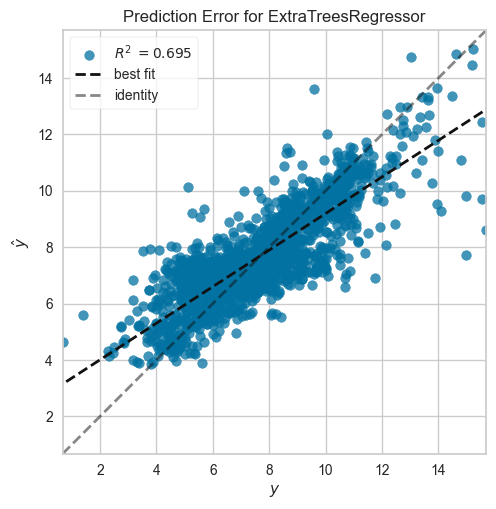

In [6]:
plot_model(ml, plot = 'error')

#### Feature importance plot showing rank-order of features (energy scores) that contribute to the model performance. 

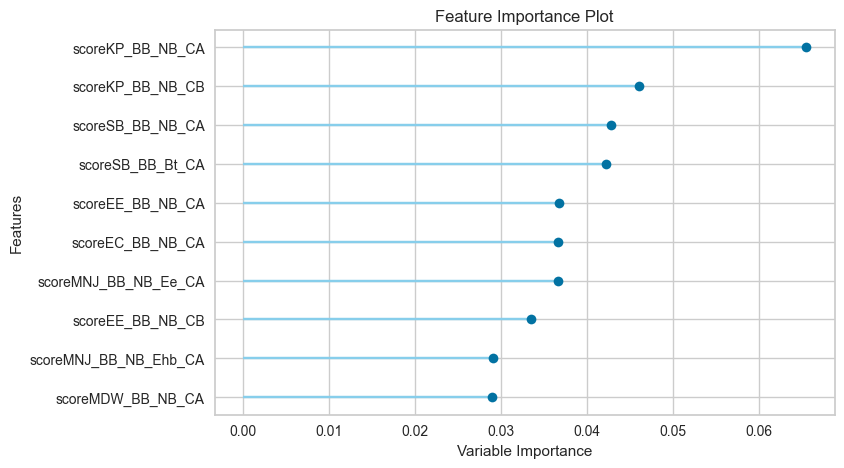

In [7]:
plot_model(ml, plot = 'feature')

#### After the initial visualization, we will write it to the feature importance file for module 2.

In [9]:
ml.feature_importances_

array([0.01393394, 0.01264762, 0.01216767, 0.0145908 , 0.01277079,
       0.01058075, 0.01007598, 0.01500194, 0.01469762, 0.01735446,
       0.01335063, 0.01300397, 0.0145818 , 0.01674593, 0.015319  ,
       0.01186742, 0.0114698 , 0.01161948, 0.01197322, 0.01434359,
       0.01529136, 0.01349804, 0.02195152, 0.0244179 , 0.02104715,
       0.04599519, 0.02799738, 0.01195834, 0.01290039, 0.02476866,
       0.02332679, 0.03346951, 0.02847693, 0.04223431, 0.01481939,
       0.04275089, 0.02710894, 0.02890022, 0.06545554, 0.01472712,
       0.02533842, 0.0129477 , 0.01351544, 0.03660061, 0.0290931 ,
       0.03669912, 0.03661363])

In [10]:
get_config('X_train_transformed').columns

Index(['scoreSB_CB', 'scoreMDS_CB', 'scoreMDW_CB', 'scoreKP_CB', 'scoreRRP_CB',
       'scoreMNJ_Etot_CB', 'scoreMNJ_Elj_CB', 'scoreMNJ_Ee_CB',
       'scoreMNJ_Ehb_CB', 'scoreEE_CB', 'scoreEC_CB', 'scoreSB_CA',
       'scoreMDS_CA', 'scoreMDW_CA', 'scoreKP_CA', 'scoreRRP_CA',
       'scoreMNJ_Etot_CA', 'scoreMNJ_Elj_CA', 'scoreMNJ_Ee_CA',
       'scoreMNJ_Ehb_CA', 'scoreEE_CA', 'scoreEC_CA', 'scoreSB_BB_NB_CB',
       'scoreMDS_BB_NB_CB', 'scoreMDW_BB_NB_CB', 'scoreKP_BB_NB_CB',
       'scoreRRP_BB_NB_CB', 'scoreMNJ_BB_NB_Etot_CB', 'scoreMNJ_BB_NB_Elj_CB',
       'scoreMNJ_BB_NB_Ee_CB', 'scoreMNJ_BB_NB_Ehb_CB', 'scoreEE_BB_NB_CB',
       'scoreEC_BB_NB_CB', 'scoreSB_BB_Bt_CA', 'scoreSB_BB_B_CA',
       'scoreSB_BB_NB_CA', 'scoreMDS_BB_NB_CA', 'scoreMDW_BB_NB_CA',
       'scoreKP_BB_NB_CA', 'scoreRRP_BB_B_CA', 'scoreRRP_BB_NB_CA',
       'scoreMNJ_BB_NB_Etot_CA', 'scoreMNJ_BB_NB_Elj_CA',
       'scoreMNJ_BB_NB_Ee_CA', 'scoreMNJ_BB_NB_Ehb_CA', 'scoreEE_BB_NB_CA',
       'scoreEC_BB_NB_C

In [11]:
#import pandas as pd
df2 = pd.DataFrame()
df2['feature'] = get_config('X_train_transformed').columns
df2['weight'] = ml.feature_importances_

In [12]:
sorted_df2 = df2.sort_values(by=['weight'], ascending=False)

In [13]:
sorted_df2

,feature,weight
38,scoreKP_BB_NB_CA,0.065456
25,scoreKP_BB_NB_CB,0.045995
35,scoreSB_BB_NB_CA,0.042751
33,scoreSB_BB_Bt_CA,0.042234
45,scoreEE_BB_NB_CA,0.036699
46,scoreEC_BB_NB_CA,0.036614
43,scoreMNJ_BB_NB_Ee_CA,0.036601
31,scoreEE_BB_NB_CB,0.033470
44,scoreMNJ_BB_NB_Ehb_CA,0.029093
37,scoreMDW_BB_NB_CA,0.028900


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, 'scoreKP_BB_NB_CA'),
  Text(1, 0, 'scoreKP_BB_NB_CB'),
  Text(2, 0, 'scoreSB_BB_NB_CA'),
  Text(3, 0, 'scoreSB_BB_Bt_CA'),
  Text(4, 0, 'scoreEE_BB_NB_CA'),
  Text(5, 0, 'scoreEC_BB_NB_CA'),
  Text(6, 0, 'scoreMNJ_BB_NB_Ee_CA'),
  Text(7, 0, 'scoreEE_BB_NB_CB'),
  Text(8, 0, 'scoreMNJ_BB_NB_Ehb_CA'),
  Text(9, 0, 'scoreMDW_BB_NB_CA'),
  Text(10, 0, 'scoreEC_BB_NB_CB'),
  Text(11, 0, 'scoreRRP_BB_NB_CB'),
  Text(12, 0, 'scoreMDS_BB_NB_CA'),
  Text(13, 0, 'scoreRRP_BB_NB_CA'),
  Text(14, 0, 'scoreMNJ_BB_NB_Ee_CB'),
  Text(15, 0, 'scoreMDS_BB_NB_CB'),
  Text(16, 0, 'scoreMNJ_BB_NB_Ehb_CB'),
  Text(17, 0, 'scoreSB_BB_NB_CB'),
  Text(18, 0, 'scoreMDW_BB_NB_CB'),
  Text(19, 0, 'scoreEE_CB'),
  Text(20, 0, 'scor

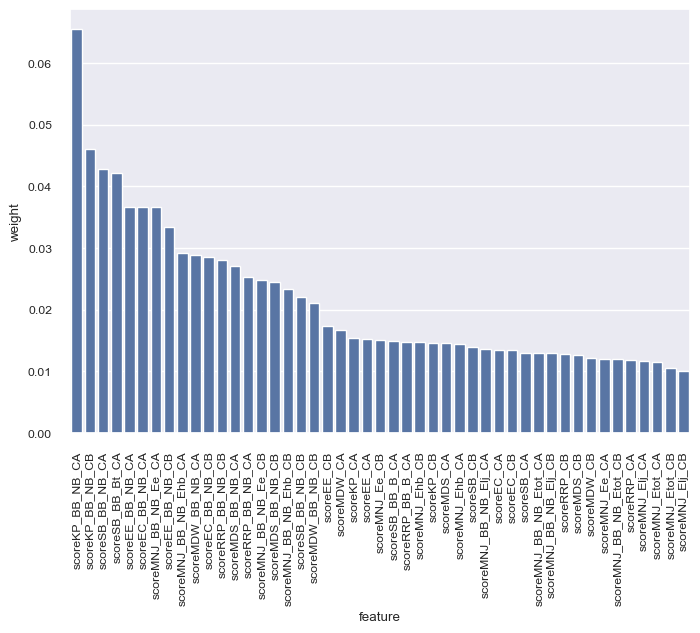

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=0.8)
sns.barplot(sorted_df2,x='feature',y='weight')
plt.xticks(rotation=90)

NOTE: replace the below filename with the customized feature filename e.g. feature_importance_"newname".csv. The stem "feature_importance_" is required.

In [15]:
sorted_df2.to_csv("feature_importance_skempiv2-pdbb.csv", index=False)

#### Next we will write the trained extra tree regressor model to the .plk format for module 2.

NOTE: replace the below filename with the customized feature filename e.g. save_model_"newname" and will be saved as a ".plk" model file. The stem "saved_model_" 

In [16]:
save_model(ml, 'saved_model_skempiv2-pdbb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['scoreSB_CB', 'scoreMDS_CB',
                                              'scoreMDW_CB', 'scoreKP_CB',
                                              'scoreRRP_CB', 'scoreMNJ_Etot_CB',
                                              'scoreMNJ_Elj_CB',
                                              'scoreMNJ_Ee_CB',
                                              'scoreMNJ_Ehb_CB', 'scoreEE_CB',
                                              'scoreEC_CB', 'scoreSB_CA',
                                              'scoreMDS_CA', 'scoreMDW_CA',
                                              'scoreKP_CA', 'scoreRRP_CA',
                                              'scoreMNJ_Etot_CA',
                                              'sc...
                                              'scoreRRP_BB_NB_CB',
                                              'scoreMNJ_BB_NB_Etot_CB',

#### After saving the model, we will load the model and test it using the test split.

In [19]:
saved_ml = load_model('saved_model_skempiv2-pdbb')

Transformation Pipeline and Model Successfully Loaded


In [20]:
pred=predict_model(saved_ml)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.8694,1.4570,1.2071,0.6946,0.1525,0.1332


#### Finally, we will save the background distribution of that train dataset into the "background" folder. Both the model, feature importance file and background file should use the same name stem. saved_model_"name-stem", feature_importance_"name-stem", "name-stem"_pred.csv.

In [22]:
pred.to_csv("../background/skempiv2-pdbb_pred.csv")

#### Now, the current "train" folder should have a feature importance file and a regressor model file (.pkl). Move those two files to the main folder to be detected when started the ML prediction module (module 2). The background file is already saved to the correct folder.